<a href="https://www.kaggle.com/code/maushamjha/used-car-price?scriptVersionId=105323755" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('../input/craigslist-carstrucks-data/vehicles.csv')

In [3]:
data.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [5]:
data.isnull().sum()/data.shape[0]*100

id                0.000000
url               0.000000
region            0.000000
region_url        0.000000
price             0.000000
year              0.282281
manufacturer      4.133714
model             1.236179
condition        40.785232
cylinders        41.622470
fuel              0.705819
odometer          1.030735
title_status      1.930753
transmission      0.598763
VIN              37.725356
drive            30.586347
size             71.767476
type             21.752717
paint_color      30.501078
image_url         0.015930
description       0.016398
county          100.000000
state             0.000000
lat               1.534155
long              1.534155
posting_date      0.015930
dtype: float64

In [6]:
x=data.isnull().sum()/data.shape[0]*100
x[x>20].index

Index(['condition', 'cylinders', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'county'],
      dtype='object')

In [7]:
data.corr()

,id,price,year,odometer,county,lat,long
id,1.000000,-0.002779,-0.059040,0.010721,NaN,-0.069388,-0.121864
price,-0.002779,1.000000,-0.004925,0.010032,NaN,0.000357,-0.000408
year,-0.059040,-0.004925,1.000000,-0.157215,NaN,-0.014677,-0.001410
odometer,0.010721,0.010032,-0.157215,1.000000,NaN,-0.001459,0.009807
county,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lat,-0.069388,0.000357,-0.014677,-0.001459,NaN,1.000000,-0.128088
long,-0.121864,-0.000408,-0.001410,0.009807,NaN,-0.128088,1.000000


In [8]:
data.nunique()[data.nunique()>300000]

id              426880
url             426880
description     360911
posting_date    381536
dtype: int64

In [9]:
data=data.drop(columns=['condition', 'cylinders', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'county','id','url','description','posting_date','region_url','image_url','lat','long'],axis=1)

In [10]:
data.sample()

,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,state
314997,east oregon,59999,2019.0,ram,diesels cummins 2500,diesel,39874.0,clean,automatic,or


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   fuel          423867 non-null  object 
 6   odometer      422480 non-null  float64
 7   title_status  418638 non-null  object 
 8   transmission  424324 non-null  object 
 9   state         426880 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 32.6+ MB


In [12]:
data.isnull().sum()

region              0
price               0
year             1205
manufacturer    17646
model            5277
fuel             3013
odometer         4400
title_status     8242
transmission     2556
state               0
dtype: int64

In [13]:
data.dropna(inplace=True)

In [14]:
data.nunique()

region            404
price           14679
year              107
manufacturer       41
model           21866
fuel                5
odometer        99827
title_status        6
transmission        3
state              51
dtype: int64

In [15]:
data.duplicated().sum()

51258

In [16]:
data.drop_duplicates(inplace=True)

In [17]:
data['region'].value_counts()

minneapolis / st paul    2740
portland                 2722
sacramento               2675
seattle-tacoma           2659
columbus                 2650
                         ... 
meridian                   19
southwest MS               13
fort smith, AR              8
kansas city                 8
west virginia (old)         7
Name: region, Length: 404, dtype: int64

In [18]:
data.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'fuel', 'odometer',
       'title_status', 'transmission', 'state'],
      dtype='object')

In [19]:
new_data=data.sample(n=1000,random_state=2)

In [20]:
new_data.nunique()

region          285
price           519
year             48
manufacturer     35
model           655
fuel              5
odometer        916
title_status      5
transmission      3
state            51
dtype: int64

<Figure size 864x864 with 0 Axes>

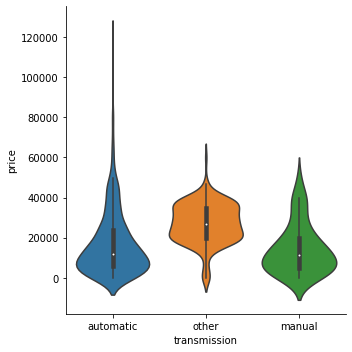

In [21]:
plt.figure(figsize=(12,12))
sns.catplot(x='transmission',y='price',kind='violin',data=new_data)

<Figure size 576x576 with 0 Axes>

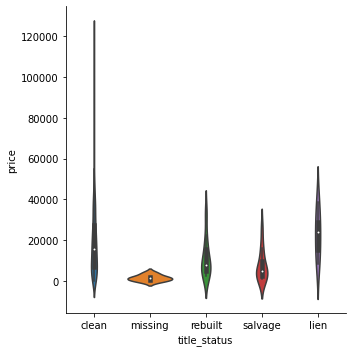

In [22]:
plt.figure(figsize=(8,8))
sns.catplot(x='title_status',y='price',kind='violin',data=new_data)

<Figure size 720x576 with 0 Axes>

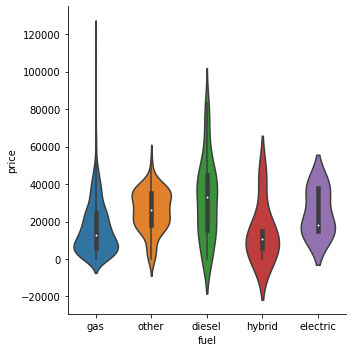

In [23]:
plt.figure(figsize=(10,8))
sns.catplot(x='fuel',y='price',kind='violin',data=new_data)

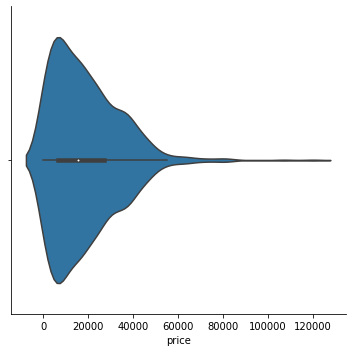

In [24]:
sns.catplot('price',kind='violin',data=new_data)

In [25]:
data.columns

Index(['region', 'price', 'year', 'manufacturer', 'model', 'fuel', 'odometer',
       'title_status', 'transmission', 'state'],
      dtype='object')

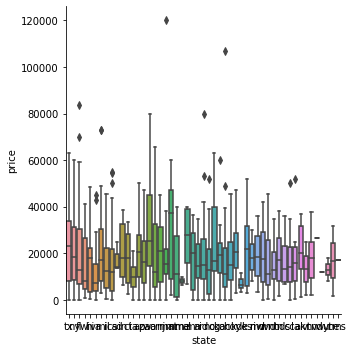

In [26]:
sns.catplot(x='state',y='price',kind='box',data=new_data)

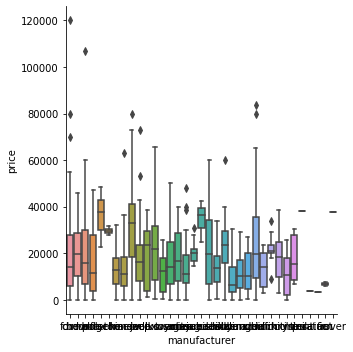

In [27]:
sns.catplot(x='manufacturer',y='price',kind='box',data=new_data)

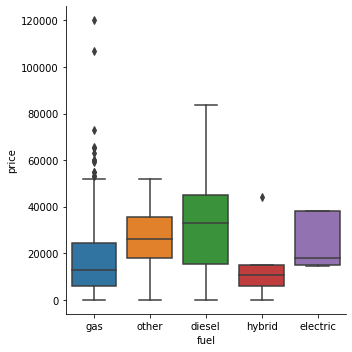

In [28]:
sns.catplot(x='fuel',y='price',kind='box',data=new_data)

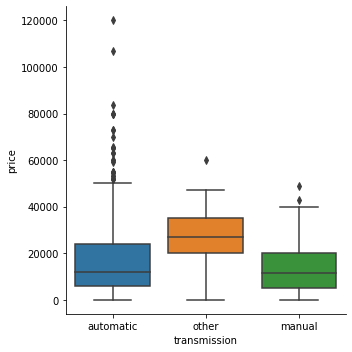

In [29]:
sns.catplot(x='transmission',y='price',kind='box',data=new_data)

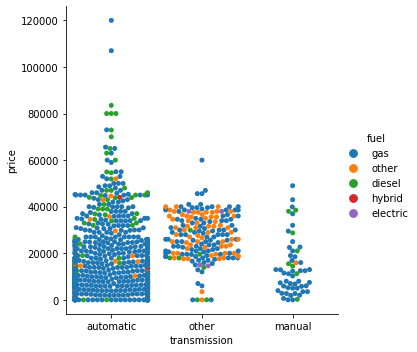

In [30]:
sns.catplot(x='transmission',y='price',kind='swarm',hue='fuel',data=new_data)

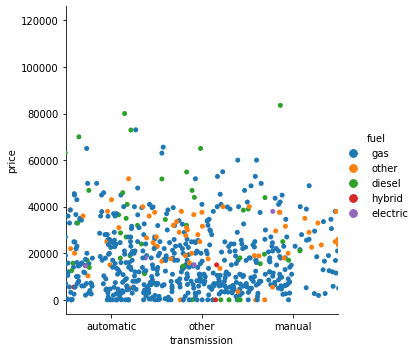

In [31]:
sns.catplot(x='transmission',y='price',kind='strip',hue='fuel',jitter=2,data=new_data)

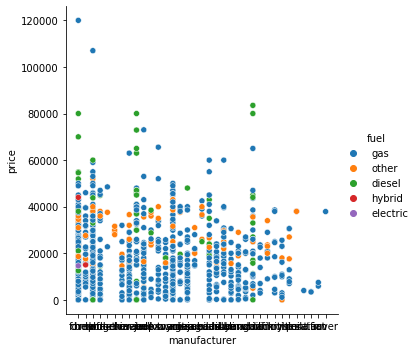

In [32]:
sns.relplot(x='manufacturer',y='price',kind='scatter',hue='fuel',data=new_data)

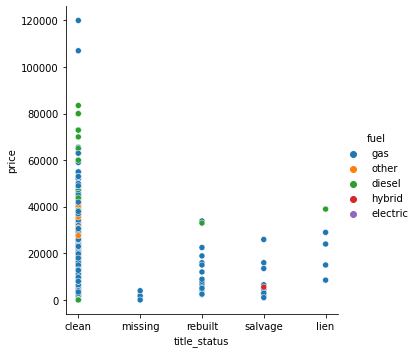

In [33]:
sns.relplot(x='title_status',y='price',kind='scatter',hue='fuel',data=new_data)

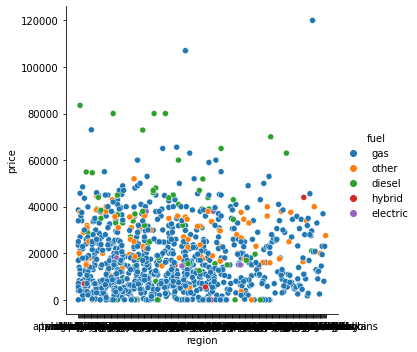

In [34]:
sns.relplot(x='region',y='price',kind='scatter',hue='fuel',data=new_data)

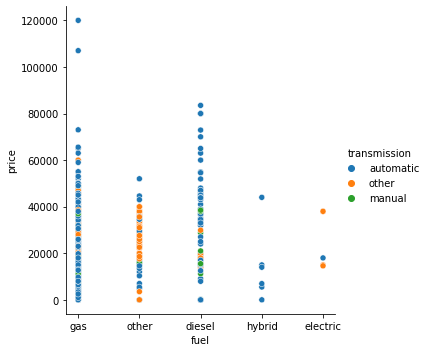

In [35]:
sns.relplot(x='fuel',y='price',kind='scatter',hue='transmission',data=new_data)

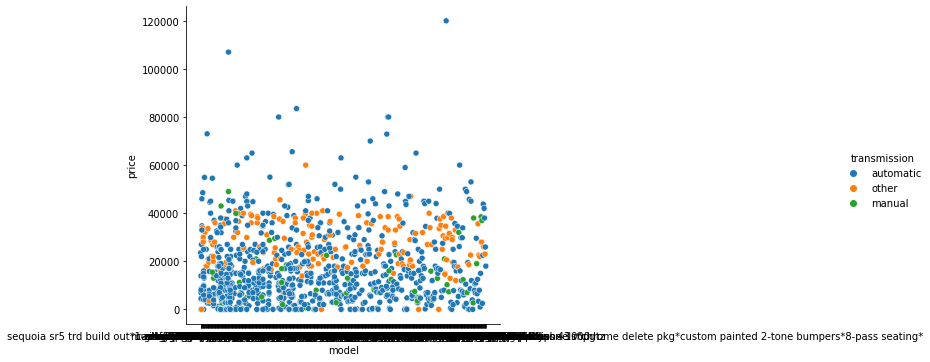

In [36]:
sns.relplot(x='model',y='price',kind='scatter',hue='transmission',data=new_data)

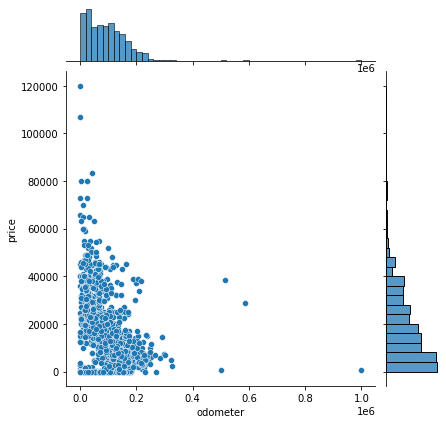

In [37]:
sns.jointplot('odometer','price',data=new_data)

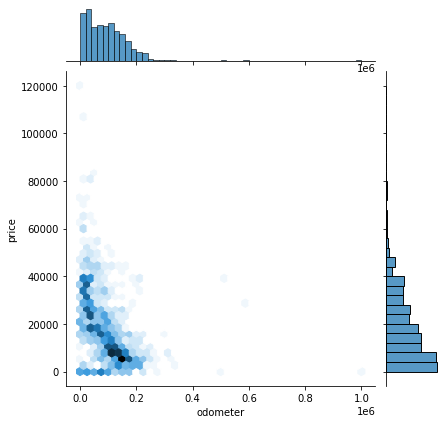

In [38]:
sns.jointplot('odometer','price',kind='hex',data=new_data)

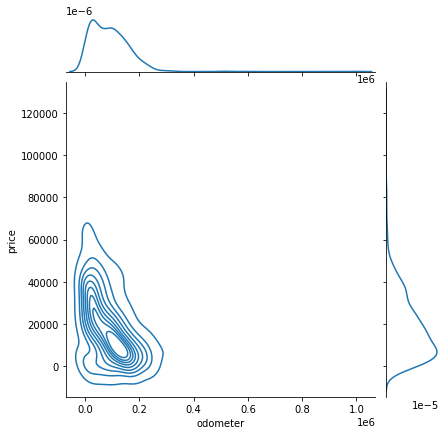

In [39]:
sns.jointplot('odometer','price',kind='kde',data=new_data)

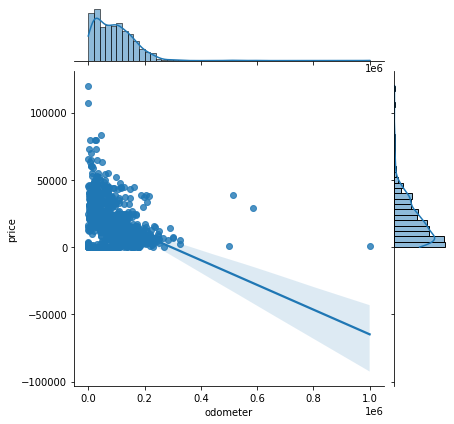

In [40]:
sns.jointplot('odometer','price',kind='reg',data=new_data)

<AxesSubplot:xlabel='price'>

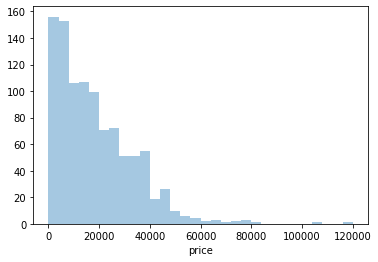

In [41]:
sns.distplot(new_data['price'],kde=False)

<AxesSubplot:xlabel='price', ylabel='Density'>

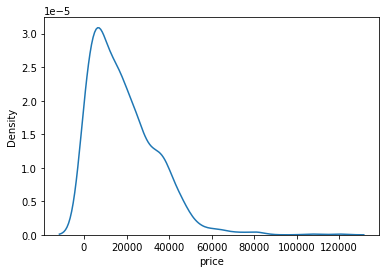

In [42]:
sns.distplot(new_data['price'],hist=False)

<AxesSubplot:xlabel='price'>

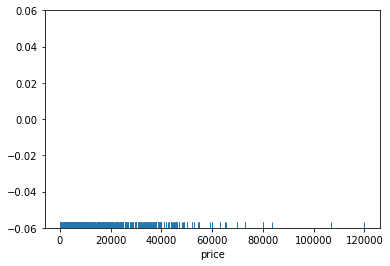

In [43]:
sns.distplot(new_data['price'],kde=False,hist=False,rug=True)

<AxesSubplot:ylabel='year'>

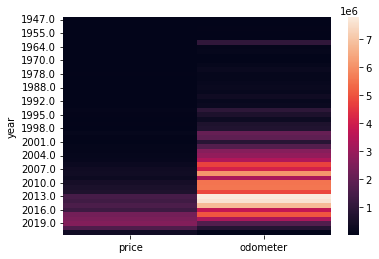

In [44]:
sns.heatmap(new_data.groupby('year').sum())

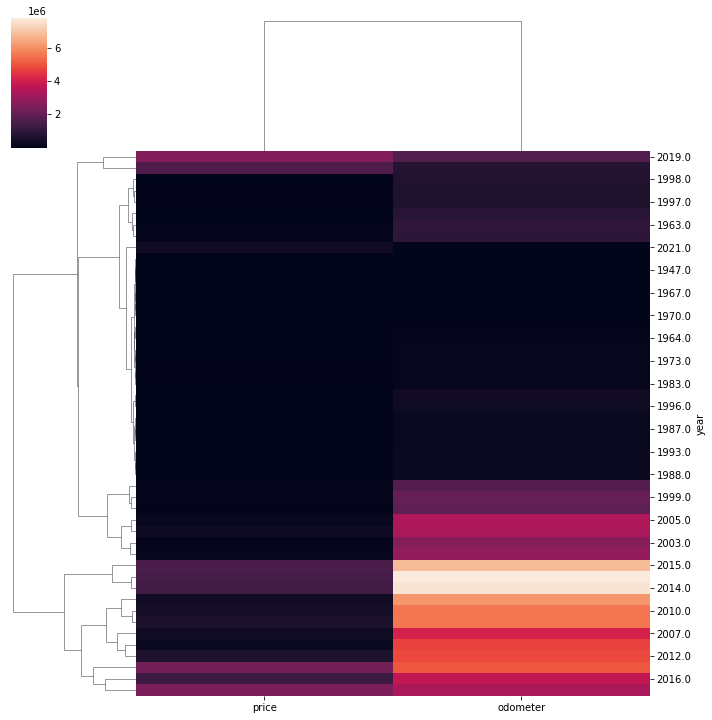

In [45]:
sns.clustermap(new_data.groupby('year').sum())

<AxesSubplot:ylabel='state'>

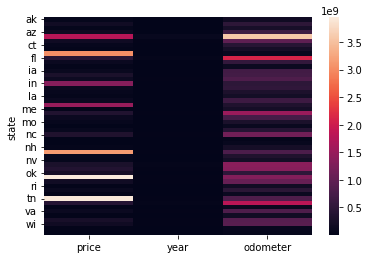

In [46]:
sns.heatmap(data.groupby('state').sum())

In [47]:
x=data.groupby('state').sum()

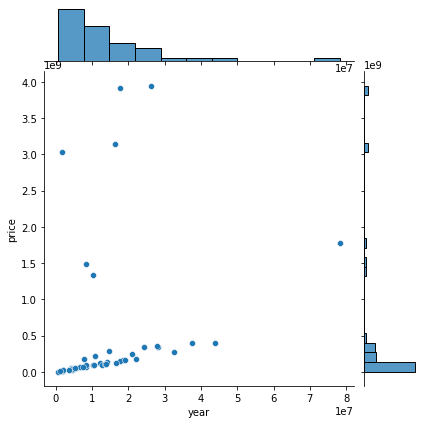

In [48]:
sns.jointplot('year','price',data=x)

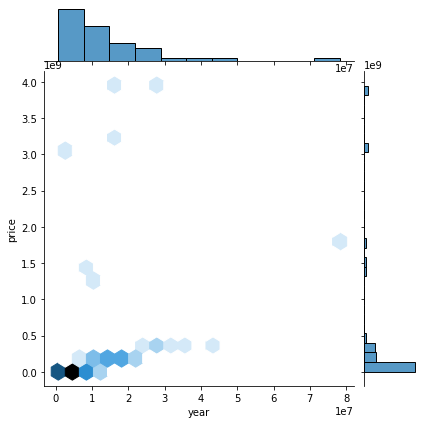

In [49]:
sns.jointplot('year','price',kind='hex',data=x)

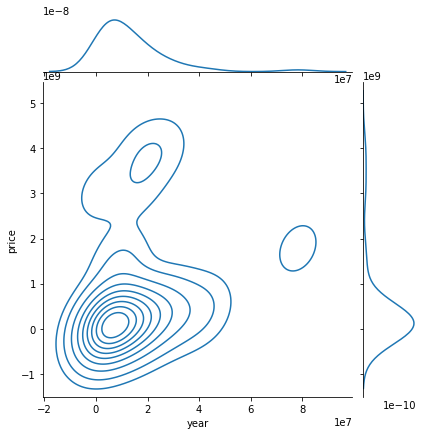

In [50]:
sns.jointplot('year','price',kind='kde',data=x)

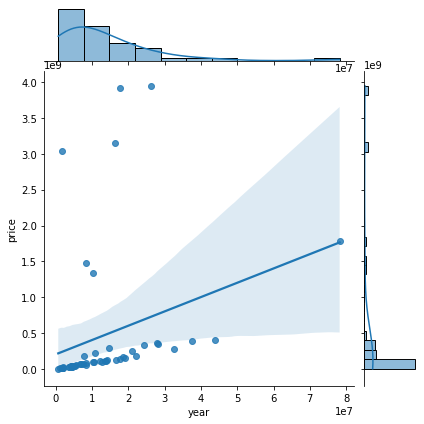

In [51]:
sns.jointplot('year','price',kind='reg',data=x)